<h2>Silas Kwok - Python Data Science Project Overview</h2> (note: Full code can be found at the bottom of the document)

The problem I'm solving is the problem of not knowing where countries stand relative to one another in terms of their population and GDP. Additionally, how do groups of countries compare based on their government type?

Information sourced from "country_per_cap_gdp_unemployment_gov_type_pop.csv" on https://github.com/ghenshaw/datasets/blob/master/country_per_cap_gdp_unemployment_gov_type_pop.csv

<h3>Sample information:</h3>

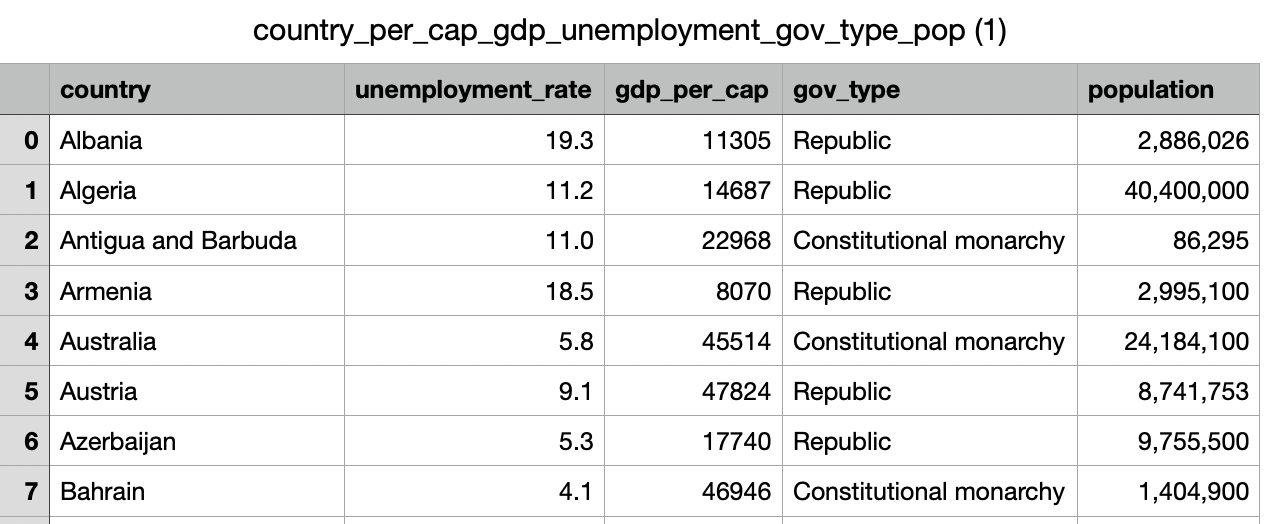

This information is interesting to me because it shows how countries compare in terms of standard economic metrics, like unemployment rate, gdp per capita, and population, and elucidates the living conditions of a country's people in the aggregate.

<h2> Application of Systematic Program Design & Design Choices </h2>
 
I applied the skills I learned in creating proper data definition and functions to solve this problem, including Compound data type (for Country data type) and Abitrary Sized data type (for List of Country data type). I also learned how to keep my project organized and easily legible by following the one task per function rule, and applied the how to design analysis programs and visualization to create the scatterplot I wanted to, with the correct legend, labels, and data I wanted. 

A design choice I made was to separate data points on my graph by GovType, which required me to apply the one task per function rule by separating the validation (is_govtype function) from the filtering (filter_govt_populations, and filter_govt_gdps). I made this choice because I think the plot would be more interesting to look at than if the data were all the same coloured points.

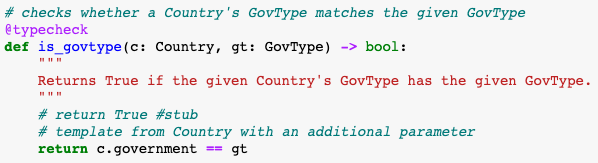

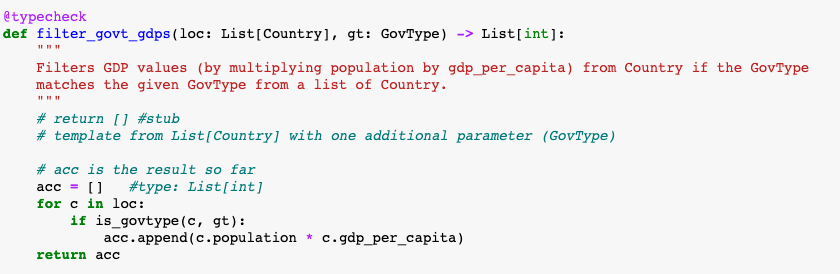

<h2>Data Visualization </h2>


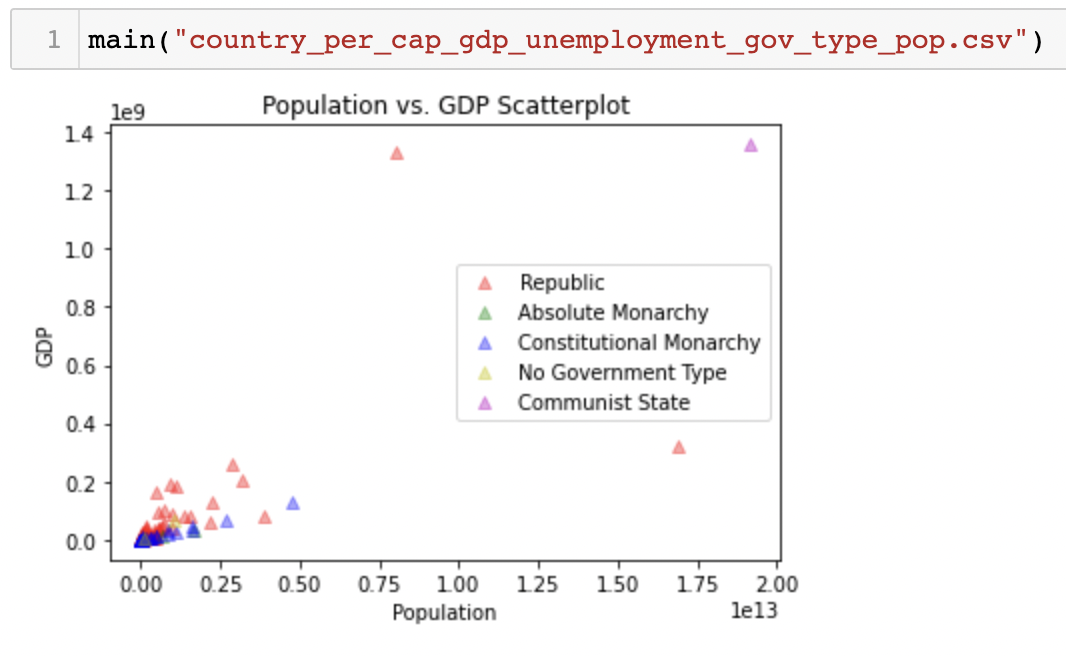

<h2> Problem Solving </h2> 

The part of the project that was the most difficult for me was figuring out how to colour the data points by government type. This was because I had tried to create "get_ (insert govtype here)_ populations" & "get_ (insert govtype here)_ gdps" functions for each govtype, but that led me to create a various helper functions like "is_govtype_republic". 

I found that this option was too clunky and didn't work too well, so I figured out that I could make the code much more efficient by using an "is_govtype" function, which takes a Country (which is an enum which has GovType as one of its parts), as well as a GovType. Then I could use this function in "filter_govt_gdps" and "filter_govt_populations". Thus, if I picked GovType.co (Communist State), the functions would look through the List of Country, and add on either the gdp (calculated by multiplying population and gdp_per_capita), or population into a list of those values only for Country with GovType.co, which would later be used as either the x axis (population) or y axis (gdp). I applied this function to each type of GovType, and plotted them to create the graph I wanted.

<h2> Limitations </h2> 

A great (albeit challenging!) and likely rewarding task would be to improve the graph by scaling the data (perhaps with a log scale) so that data points in the bottom left cluster are more easily visible. Another highly valuable addition would be to add country names beside each of these points so that a lot more can be taken away from just looking at the graph.

<h2> Potential future projects/applications of systematic programming design skills </h2> 

Some examples of ways I could use systematic programming design skills to solve problems in your chosen topic area (economics) in the future include:
1. Looking through and analyzing economics csv. files (e.g. gini coefficient, inequality, financial indicators) and finding the highest or lowest of any variable.
2. Finding the sum of a certain type of data (e.g. only data from countries with an unemployment rate <= 15%).
3. Manipulating economic data to discover new insights about countries or organizations for which I have data.
4. Plotting economic data in a way that is easily comprehensible and or which trends or outliers can be observed.

<h2> Planning + Full Code </h2> 

### Step 1a: Planning 

The available information in 'country_per_cap_gdp_unemployment_gov_type_pop.csv' includes:
- an index column
- country (country name, which is a string)
- unemployment_rate (which is a float in range [0, 100])
- gdp_per_cap (GDP per capita, which is an int with range [0, ...])
- gov_type (Government Type, which is a string of either "Republic", "Constitutional Monarchy", "Absolute Monarchy", "n/a", or "Communist State")
- population (which is an int (although represented as a string because there are commas) in range [0, ...])

The information in the file that my program will read are 
- country, 
- gdp_per_cap, 
- gov_type (one of Republic, Constitutional Monarchy, Absolute monarchy, Communist State, or n/a), and 
- population.

The unusual features in the data are that Libya and Thailand have "n/a" as their government type, and there are 4 absolute monarchies (UAE, Brunei, Swaziland, and Saudi Arabia). Also, the values in the population column are separate by commas every 3 digit places, while the values in GDP per capita are not.

### Step 1b: Planning 
#### Brainstorm program ideas + Select Program


The initial ideas in my proposal were (1) a bar graph (with country on the x axis grouped by government type and GDP on the y axis), (2) a scatterplot (with unemployment rates on the x axis and GDP per capita on the y axis), and (3) a scatterplot (with unemployment rates on the x axis and GDP per capita on the y-axis, with countries coloured by continent).

Some ideas building on this initial brainstorming (THAT INCLUDE SUBSTANTIAL COMPUTATION, since GDP = gdp_per_capita * population) are:

I could (1) group the bar graph with GDP on the y-axis with country on the x axis grouped by government type (with GDP in descending order).

I could do also (2) a scatterplot of GDP vs. population, with each country coloured by government type.

I could do (3) a pie chart with each continent's share of GDP (or country's share of GDP, if information is still clear in that case).

I could also do (4) a bar graph where I group the data by continent and take the average of each continent's GDP so that we can compare continents and countries by their GDP.

There isn't a column with the data on continents, so (3) and (4) would require information outside of the data set. Since there are only a few government types and some government types have very few data points (e.g. absolute monarchies) and missing data like N/A for some countries' government type, (1) may not be the best option in terms of delivering some insight on the data.

Thus, I choose to do (2), because it will be interesting to see how different countries and different government types compare in terms of their GDP and population. 

To pursue option (2), I would need to 
1. Make a new column called GDP, which would be calculated by multiplying "population" by "gdp per capita". This would be the y-axis of my scatterplot, while population would be my x-axis.
2. Plot the GDP against the population, and assign each point either a different colour (or shape) based on its government type, as well as label each point with its name (if space permits).

### Step 1c: Planning 
#### An example of what my program would produce
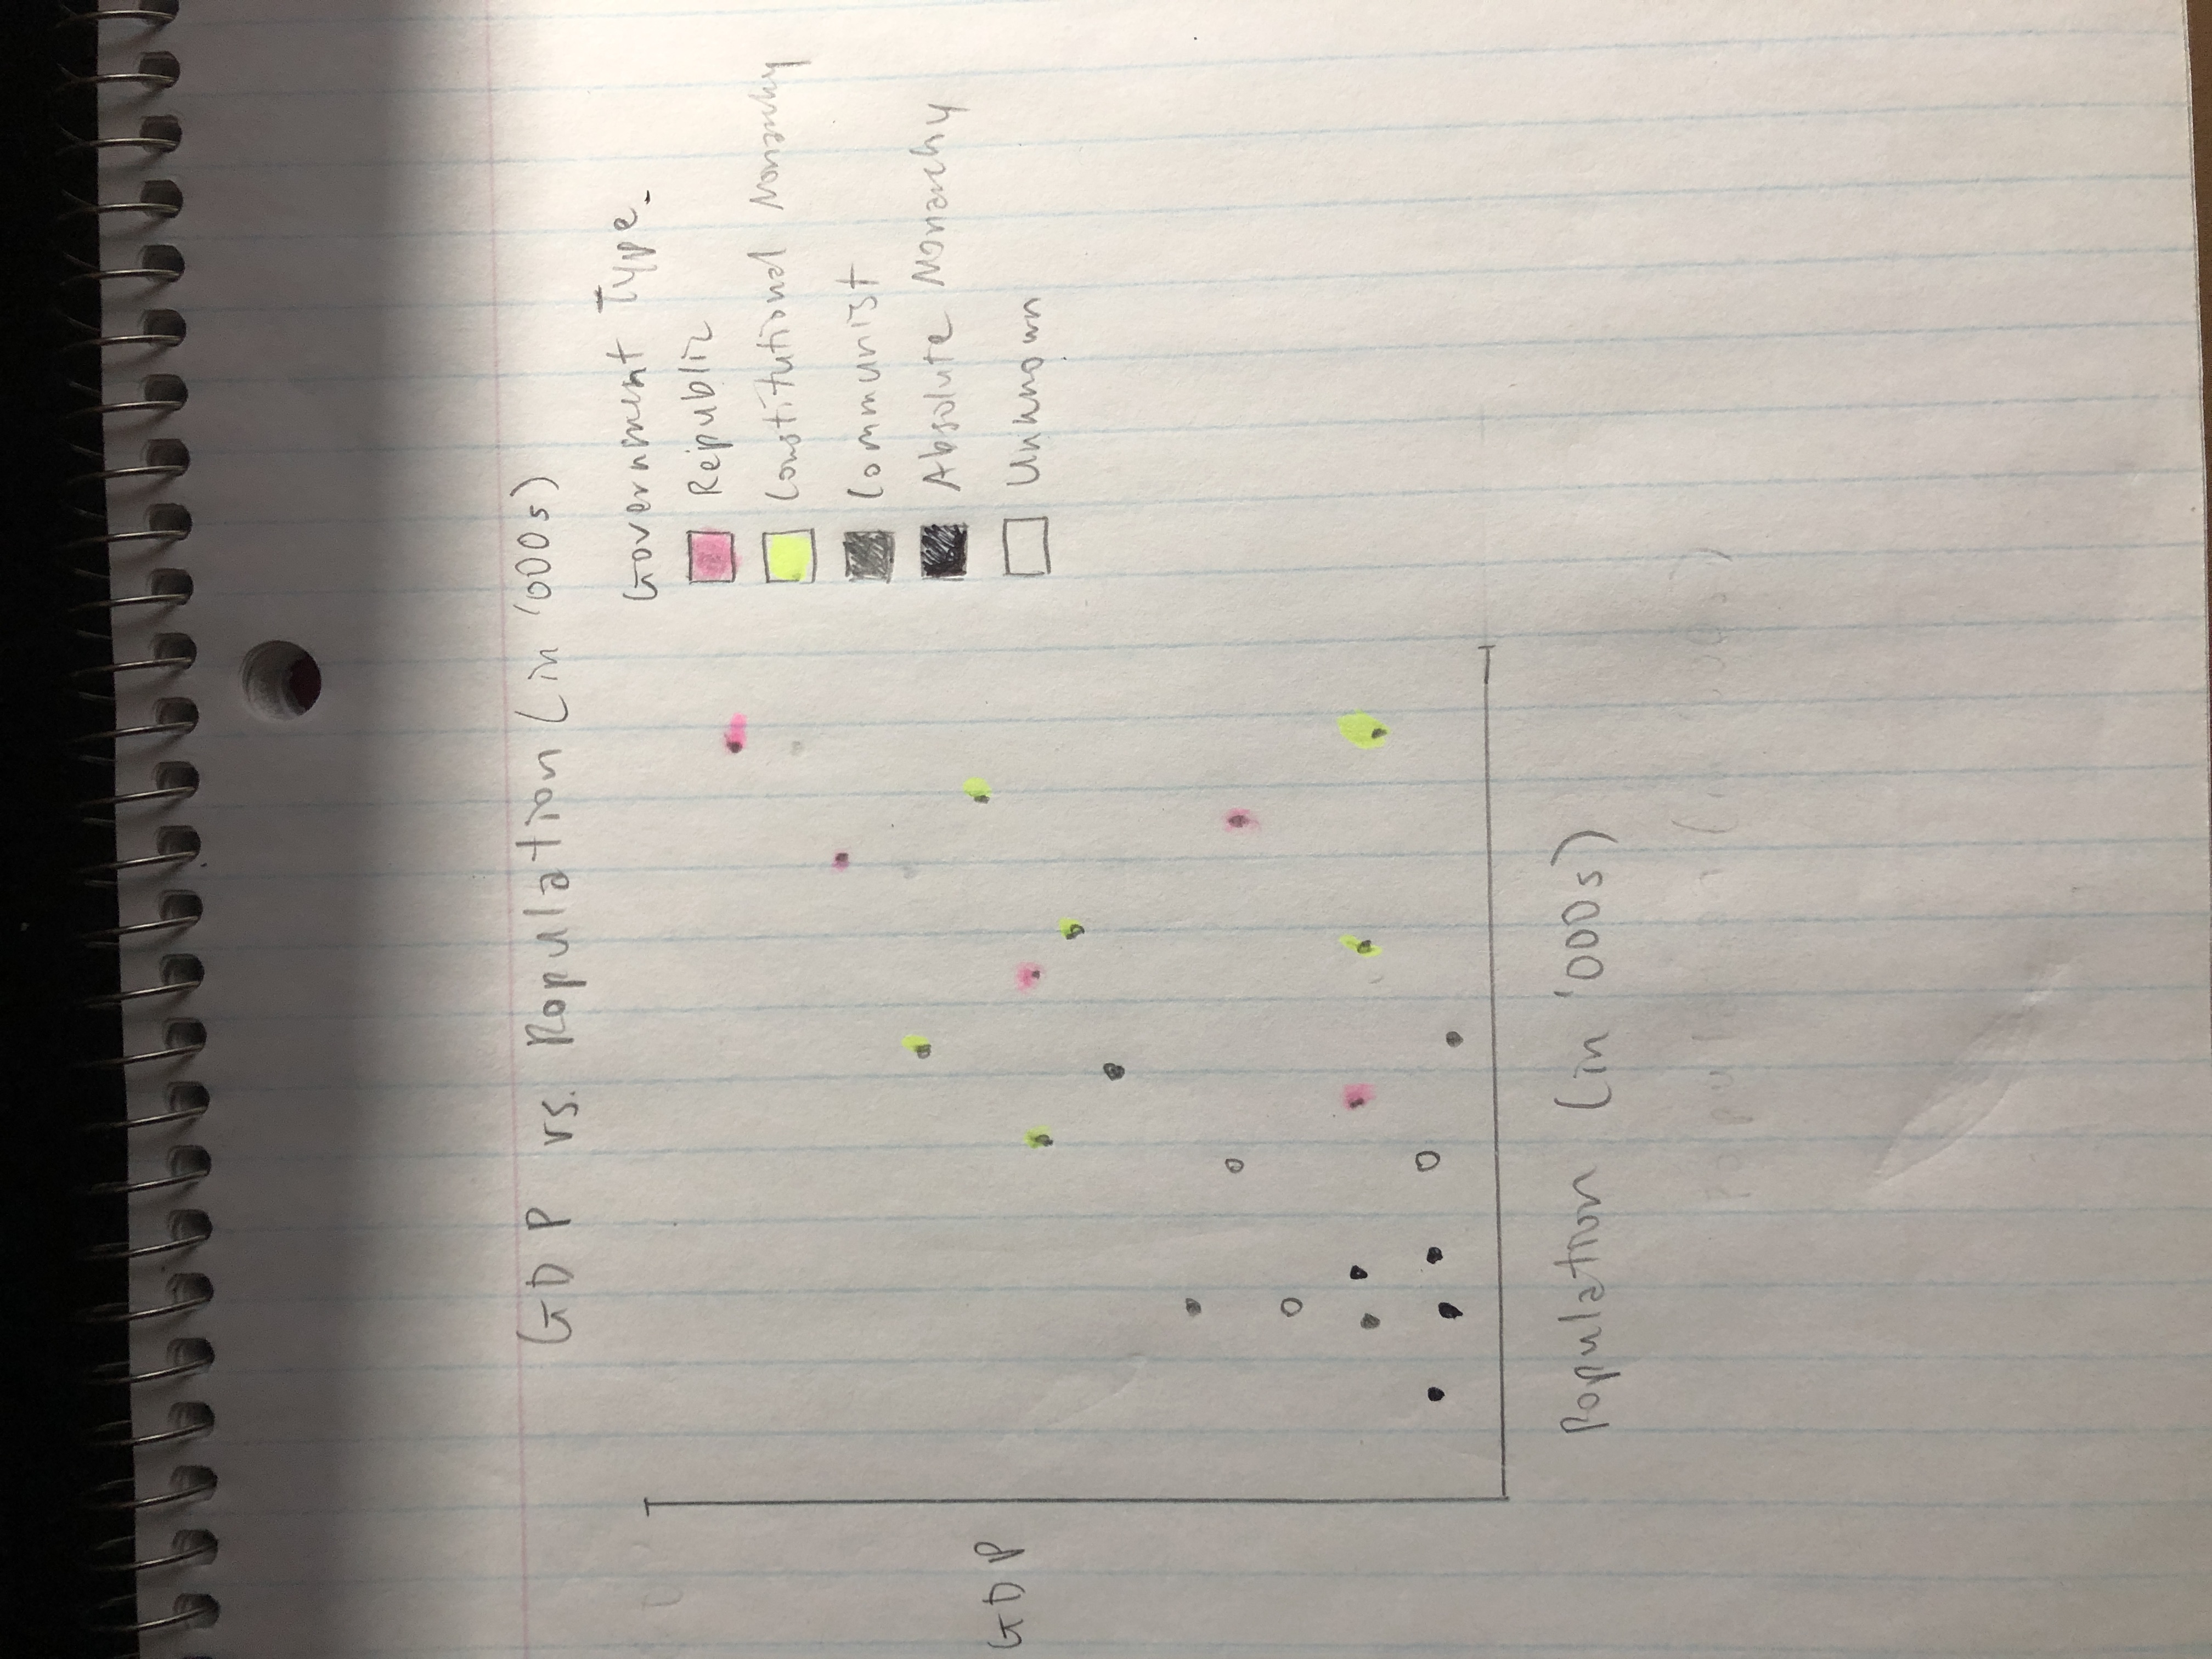

### Step 2: Designing data definitions

The information in the file I choose to represent is a country's name, gdp_per_capita, gov_type, and population. This information is important because GDP (as the y-axis) will be determined by finding the product of gdp_per_capita and population, population will be the x-axis, and gov_type will be used to colour the data points while country (name) will be used to label each point on the scatterplot if space permits.

In [ ]:
from cs103 import *
from typing import NamedTuple, List, Optional
from enum import Enum
import csv
import matplotlib.pyplot as plt

##################
# Data Definitions

# Gov Type Enum Data Definition
GovType = Enum('GovType', ['re', 'cm', 'am', 'co', 'no'])
# interp. a govtype as either a republic ('re'), a constitutional monarchy ('cm') an absolute monarchy ('am'),
# a communist state ('co'), or no government type ('no').
# examples are redundant for enumerations   
@typecheck
# template based on one of (5 cases) and atomic distinct (5 times)
def fn_for_govtype(gt: GovType) -> ...:
    if gt == GovType.re:
        return ...
    elif gt == GovType.cm:
        return ...
    elif gt == GovType.am:
        return ...
    elif gt == GovType.co:
        return ...
    elif gt == GovType.no:
        return ...
    
# Country Compound Data Definition
Country = NamedTuple('Country', [('country_name', str),
                                ('gdp_per_capita', int), # in range (0, 101926]
                                ('government', GovType),
                                ('population', int)]) #in range (0, 1357000000]
# interp. a country as a name (country_name), a GDP per capita integer value (gdp_per_capita) (must be greater 
# than 0), a government (one of republic ('re'), constitutional monarchy ('cm'), absolute monarchy ('am'), 
# communist state ('co'), or no government type ('no')), and a population integer value (must be greater than 0).

C1 = Country("Country A", 1, GovType.no, 15000)
C2 = Country("Country B", 200000, GovType.cm, 500000)
C3 = Country("Country C", 300000, GovType.am, 500000)
C4 = Country("Country D", 400000, GovType.co, 500000)
C5 = Country("Country E", 500000, GovType.re, 500000)
C6 = Country("Country F", 4, GovType.no, 15000)

@typecheck
def fn_for_country(c: Country) -> ...: # template based on Compound (4 fields) and reference rule (once)
    return ...(c.country_name,
               c.gdp_per_capita,
               fn_for_govtype(c.government),
               c.population)

# List of Country Data Definition
# List[Country]
# interp. a list of Country

LOC0 = []
LOC1 = [C1]
LOC2 = [C1### Step 3: Designing functions, C2, C3, C5]
LOC3 = [C1, C6]

# template based on abitrary-sized and reference rule
@typecheck
def fn_for_loc(loc: List[Country]) -> ...: 
    # description of the accumulator       
    acc = ...      # type: ...
    for c in loc:
        acc = ...(fn_for_country(c), acc)
    return ...(acc)

### Step 3: Designing functions

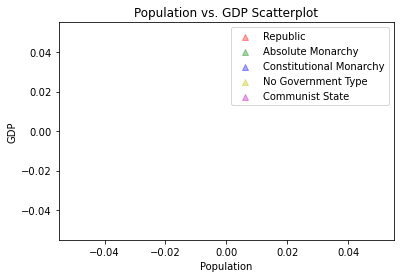

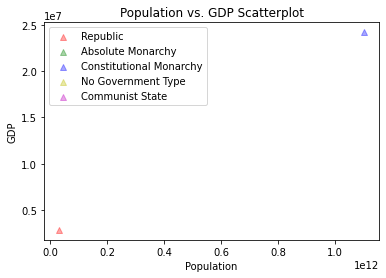

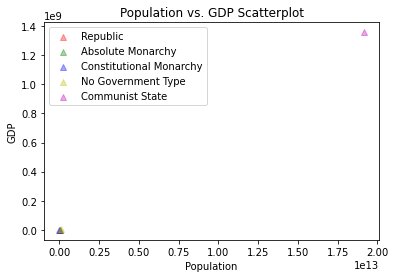

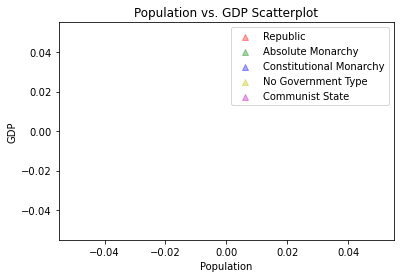

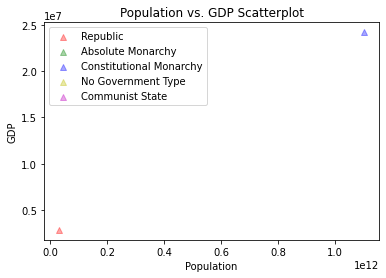

35 of 35 tests passed


In [2]:
###########
# Functions
@typecheck
def main(filename: str) -> None:
    """
    Reads the "Country"s from given filename and shows a scatterplot of the GDP and population.
    """
    # Template from HtDAP, based on composition
    return show_scatterplot(read(filename))

@typecheck
def show_scatterplot(loc: List[Country]) -> None:
    """
    creates a scatterplot of the GDP and population, returns None.
    """
    # return None  #stub
    # Template based on visualization

    # set the labels for the axes
    plt.xlabel('Population')
    plt.ylabel('GDP')
    plt.title('Population vs. GDP Scatterplot')

    re_gdps = filter_govt_gdps(loc, GovType.re)
    am_gdps = filter_govt_gdps(loc, GovType.am)
    cm_gdps = filter_govt_gdps(loc, GovType.cm)
    no_gdps = filter_govt_gdps(loc, GovType.no)
    co_gdps = filter_govt_gdps(loc, GovType.co)

    re_populations = filter_govt_populations(loc, GovType.re)
    am_populations = filter_govt_populations(loc, GovType.am)
    cm_populations = filter_govt_populations(loc, GovType.cm)
    no_populations = filter_govt_populations(loc, GovType.no)
    co_populations = filter_govt_populations(loc, GovType.co)
    
    # create the scatterplot, with markers that are red (c='r') and triangular (marker='^') 
    # for countries with Republic government type, 
    # with markers that are green (c='g') and triangular (marker='^') 
    # for countries with Absolute Monarchy government type,
    # with markers that are blue (c='b') and triangular (marker='^') 
    # for countries with Constitutional Monarchy government type,
    # with markers that are yellow (c='y') and triangular (marker='^') 
    # for countries with No Government type,
    # with markers that are magenta (c='m') and triangular (marker='^') 
    # for countries with Communist State government type.
    plt.scatter(re_gdps, re_populations, marker='^', c='r', alpha=0.35, label = "Republic")
    plt.scatter(am_gdps, am_populations, marker='^', c='g', alpha=0.35, label = "Absolute Monarchy")
    plt.scatter(cm_gdps, cm_populations, marker='^', c='b', alpha=0.35, label = "Constitutional Monarchy")
    plt.scatter(no_gdps, no_populations, marker='^', c='y', alpha=0.35, label = "No Government Type")
    plt.scatter(co_gdps, co_populations, marker='^', c='m', alpha=0.35, label = "Communist State")
    
    # show the plot
    plt.legend()
    plt.show()
    
    return None

@typecheck
def read(filename: str) -> List[Country]:
    """    
    reads information from the specified file and returns a list of Country data (all rows).
    """
    # return []  #stub
    # Template from HtDAP
    # loc contains the result so far
    loc = [] # type: List[Country]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            #row is a List[str]
            c = Country(row[1], parse_int(row[3]), parse_gov_type(row[4]), parse_int(remove_quotations(remove_commas(row[5]))))
            loc.append(c)
    
    return loc

# removes commas from population data
@typecheck
def remove_commas(s: str) -> str:
    """
    Given a string s, return a string with the commas removed from the string.
    """
    # return "" #stub
    # template from atomic non-distinct
    s = s.replace(',', '')
    return s

# removes quotations from population data
@typecheck
def remove_quotations(s: str) -> str:
    """
    Given a string s, return a string with the quotation marks removed from the string.
    """
    # return "" #stub
    # template from atomic non-distinct
    s = s.replace('"', '')
    return s

# transforms string data into GovType
@typecheck
def parse_gov_type(s: str) -> GovType:
    """
    Given a string s, produce the corresponding GovType.
    """
    # return GovType.no #stub
    # template based on one-of (5 cases), atomic distinct (5 times)
    if s == "Republic":
        return GovType.re
    elif s == "Absolute monarchy":
        return GovType.am
    elif s == "Constitutional monarchy":
        return GovType.cm
    elif s == "n/a":
        return GovType.no
    elif s == "Communist state":
        return GovType.co

# checks whether a Country's GovType matches the given GovType
@typecheck
def is_govtype(c: Country, gt: GovType) -> bool:
    """
    Returns True if the given Country's GovType has the given GovType.
    """
    # return True #stub
    # template from Country with an additional parameter
    return c.government == gt

@typecheck
def filter_govt_gdps(loc: List[Country], gt: GovType) -> List[int]:
    """
    Filters GDP values (by multiplying population by gdp_per_capita) from Country if the GovType 
    matches the given GovType from a list of Country.
    """
    # return [] #stub
    # template from List[Country] with one additional parameter (GovType)
    
    # acc is the result so far
    acc = []   #type: List[int]
    for c in loc:
        if is_govtype(c, gt):
            acc.append(c.population * c.gdp_per_capita)
    return acc

@typecheck
def filter_govt_populations(loc: List[Country], gt: GovType) -> List[int]:
    """
    Filters population values from Country if the GovType matches the given GovType from a list of Country.
    """
    # return [] #stub
    # template from List[Country] with one additional parameter (GovType)
    
    # acc is the result so far
    acc = []   #type: List[int]
    for c in loc:
        if is_govtype(c, gt):
            acc.append(c.population)
    return acc

# Begin testing
start_testing()

#Examples and tests for main

#Should produce an empty plot with title: "Population vs. GDP Scatterplot", 
#x axis should have a label showing 'Population' and y axis should have a label
#showing 'GDP'.
expect(main("testfile_empty.csv"), None)

#Should produce a plot with title: "Population vs. GDP Scatterplot", 
#x axis should have a label showing 'Population' and y axis should have a label
#showing 'GDP'. There should be two data points on the plot; one red triangle at 
#(2886026,2886026*11305), and a blue triangle at (24184100, 24184100*45514).
expect(main("testfile_small1.csv"), None)

#Should produce a plot with title: "Population vs. GDP Scatterplot", 
#x axis should have a label showing 'Population' and y axis should have a label
#showing 'GDP'. There should be five data points on the plot; one red triangle at 
#(2886026,2886026*11305), one green triangle at (411900, 411900*70817),
#one blue triangle at (86295, 86295*22968), one yellow triangle at (6385000, 6385000*14154),
#and one magenta triangle at (1357000000, 1357000000*14107).
expect(main("testfile_small2.csv"), None)

#Examples and tests for show_scatterplot

#Should produce an empty plot with title: "Population vs. GDP Scatterplot", 
#x axis should have a label showing 'Population' and y axis should have a label
#showing 'GDP'.
expect(show_scatterplot([]), None)

#Should produce a plot with title: "Population vs. GDP Scatterplot", 
#x axis should have a label showing 'Population' and y axis should have a label
#showing 'GDP'. There should be two data points on the plot; one red triangle at 
#(2886026,2886026*11305), and a blue triangle at (24184100, 24184100*45514).
expect(show_scatterplot([Country("Albania", 11305, GovType.re, 2886026), 
                         Country("Australia", 45514, GovType.cm, 24184100)]), None)

# Examples and tests for read
expect(read("testfile_empty.csv"), [])
expect(read("testfile_small1.csv"), [Country("Albania", 11305, GovType.re, 2886026), 
                                     Country("Australia", 45514, GovType.cm, 24184100)])
expect(read("testfile_small2.csv"), [Country("Albania", 11305, GovType.re, 2886026),
                                     Country("Brunei", 70817, GovType.am, 411900), 
                                     Country("Antigua and Barbuda", 22968, GovType.cm, 86295),
                                     Country("Libya", 14154, GovType.no, 6385000),
                                     Country("China", 14107, GovType.co, 1357000000)])

# Examples and tests for remove_commas
expect(remove_commas(""), "")
expect(remove_commas("1,000"), "1000")
expect(remove_commas("1,000,000"), "1000000")
expect(remove_commas("20,000,000"), "20000000")

# Examples and tests for remove_quotations
expect(remove_quotations('"20"'), '20')
expect(remove_quotations('"1000"'), '1000')
expect(remove_quotations('"1000000"'), '1000000')
expect(remove_quotations('"20000000"'), '20000000')

# Examples and tests for parse_gov_type
expect(parse_gov_type("Republic"), GovType.re)
expect(parse_gov_type("Constitutional monarchy"), GovType.cm)
expect(parse_gov_type("Absolute monarchy"), GovType.am)
expect(parse_gov_type("Communist state"), GovType.co)
expect(parse_gov_type("n/a"), GovType.no)

#Examples and tests for is_govtype
expect(is_govtype(Country("Country A", 1, GovType.no, 15000), GovType.no), True)
expect(is_govtype(Country("Country B", 200000, GovType.cm, 500000), GovType.no), False)
expect(is_govtype(C1, GovType.no), True)
expect(is_govtype(C2, GovType.no), False)

#Examples and tests for filter_govt_gdps
expect(filter_govt_gdps([], GovType.no), [])
expect(filter_govt_gdps([C1, C2], GovType.no), [15000])
expect(filter_govt_gdps(LOC3, GovType.cm), [])
expect(filter_govt_gdps(LOC3, GovType.no), [15000, 15000*4])
expect(filter_govt_gdps([C1, C2, C3, C4, C5, C6], GovType.co), [400000*500000])

#Examples and tests for filter_govt_populations
expect(filter_govt_populations([], GovType.co), [])
expect(filter_govt_populations([C1, C2], GovType.no), [15000])
expect(filter_govt_populations(LOC3, GovType.cm), [])
expect(filter_govt_populations(LOC3, GovType.no), [15000, 15000])
expect(filter_govt_populations([C1, C2, C3, C4, C5, C6], GovType.co), [500000])

# show testing summary
summary()

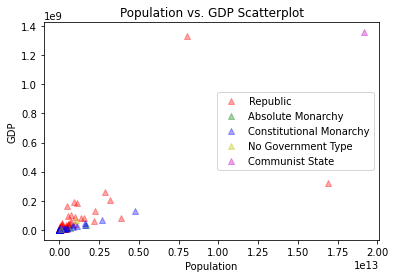

In [3]:
main("country_per_cap_gdp_unemployment_gov_type_pop.csv")